In [62]:
import pandas as pd
import sklearn
X = pd.read_csv("interstate.csv")
targets = X['outcome'].value_counts().keys().tolist()
for i in range (len(targets)):
    targets[i] = str(targets[i])
features = list(X)

In [41]:
y = X.pop("outcome").values

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

In [43]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

featureSet = ['initiation','combat_location','combat_fatalities',]

X_train_sf = X_train[featureSet].copy()
X_test_sf = X_test[featureSet].copy()

ohe.fit(X_train_sf)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=False)

In [44]:
X_train_sf_encoded = ohe.transform(X_train_sf)
X_test_sf_encoded = ohe.transform(X_test_sf)

In [45]:
from sklearn import tree

In [46]:
clf_dt = tree.DecisionTreeClassifier(random_state=1, max_depth=None)

[Text(292.69325153374234, 215.34923076923076, 'X[6] <= 0.5\ngini = 0.658\nsamples = 252\nvalue = [115, 86, 4, 22, 24, 1]'),
 Text(267.0184049079755, 211.1676923076923, 'X[17] <= 0.5\ngini = 0.592\nsamples = 187\nvalue = [96, 70, 4, 11, 5, 1]'),
 Text(262.9104294478528, 206.98615384615385, 'X[4] <= 0.5\ngini = 0.601\nsamples = 178\nvalue = [87, 70, 4, 11, 5, 1]'),
 Text(248.53251533742332, 202.80461538461537, 'X[98] <= 0.5\ngini = 0.57\nsamples = 163\nvalue = [83, 67, 4, 5, 3, 1]'),
 Text(240.31656441717794, 198.62307692307692, 'X[50] <= 0.5\ngini = 0.564\nsamples = 159\nvalue = [83, 64, 4, 4, 3, 1]'),
 Text(236.20858895705524, 194.44153846153847, 'X[51] <= 0.5\ngini = 0.558\nsamples = 158\nvalue = [83, 64, 4, 4, 3, 0]'),
 Text(232.10061349693254, 190.26, 'X[47] <= 0.5\ngini = 0.553\nsamples = 157\nvalue = [83, 64, 4, 4, 2, 0]'),
 Text(227.99263803680984, 186.07846153846154, 'X[104] <= 0.5\ngini = 0.547\nsamples = 156\nvalue = [83, 64, 4, 4, 1, 0]'),
 Text(223.88466257668713, 181.896923

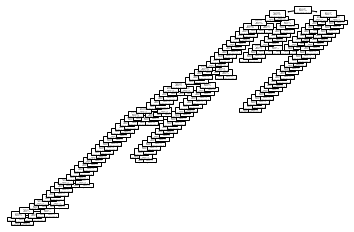

In [47]:
tree.plot_tree(clf_dt.fit(X_train_sf_encoded, y_train))

In [48]:
y_predicted = clf_dt.predict(X_train_sf_encoded[0:10])
print(y_predicted)
clf_dt.predict_proba(X_train_sf_encoded[0:10])

[2 4 2 1 1 1 2 6 1 1]


array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

[Text(251.1, 211.7178947368421, 'X[3] <= 0.5\ngini = 0.618\nsamples = 85\nvalue = [40, 33, 6, 6]'),
 Text(192.66792452830188, 200.2736842105263, 'X[1] <= 0.5\ngini = 0.653\nsamples = 57\nvalue = [21, 25, 5, 6]'),
 Text(138.97358490566037, 188.82947368421054, 'X[17] <= 0.5\ngini = 0.655\nsamples = 20\nvalue = [10, 5, 3, 2]'),
 Text(126.33962264150944, 177.38526315789474, 'X[43] <= 0.5\ngini = 0.599\nsamples = 18\nvalue = [10, 5, 1, 2]'),
 Text(113.70566037735848, 165.94105263157894, 'X[113] <= 0.5\ngini = 0.561\nsamples = 17\nvalue = [10, 5, 1, 1]'),
 Text(101.07169811320755, 154.49684210526317, 'X[5] <= 0.5\ngini = 0.539\nsamples = 16\nvalue = [10, 4, 1, 1]'),
 Text(56.85283018867924, 143.05263157894737, 'X[2] <= 0.5\ngini = 0.397\nsamples = 11\nvalue = [8, 3, 0, 0]'),
 Text(31.58490566037736, 131.60842105263157, 'X[6] <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2, 0, 0]'),
 Text(18.950943396226414, 120.16421052631578, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(44.21886

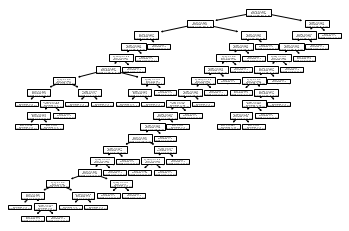

In [49]:
tree.plot_tree(clf_dt.fit(X_test_sf_encoded, y_test))

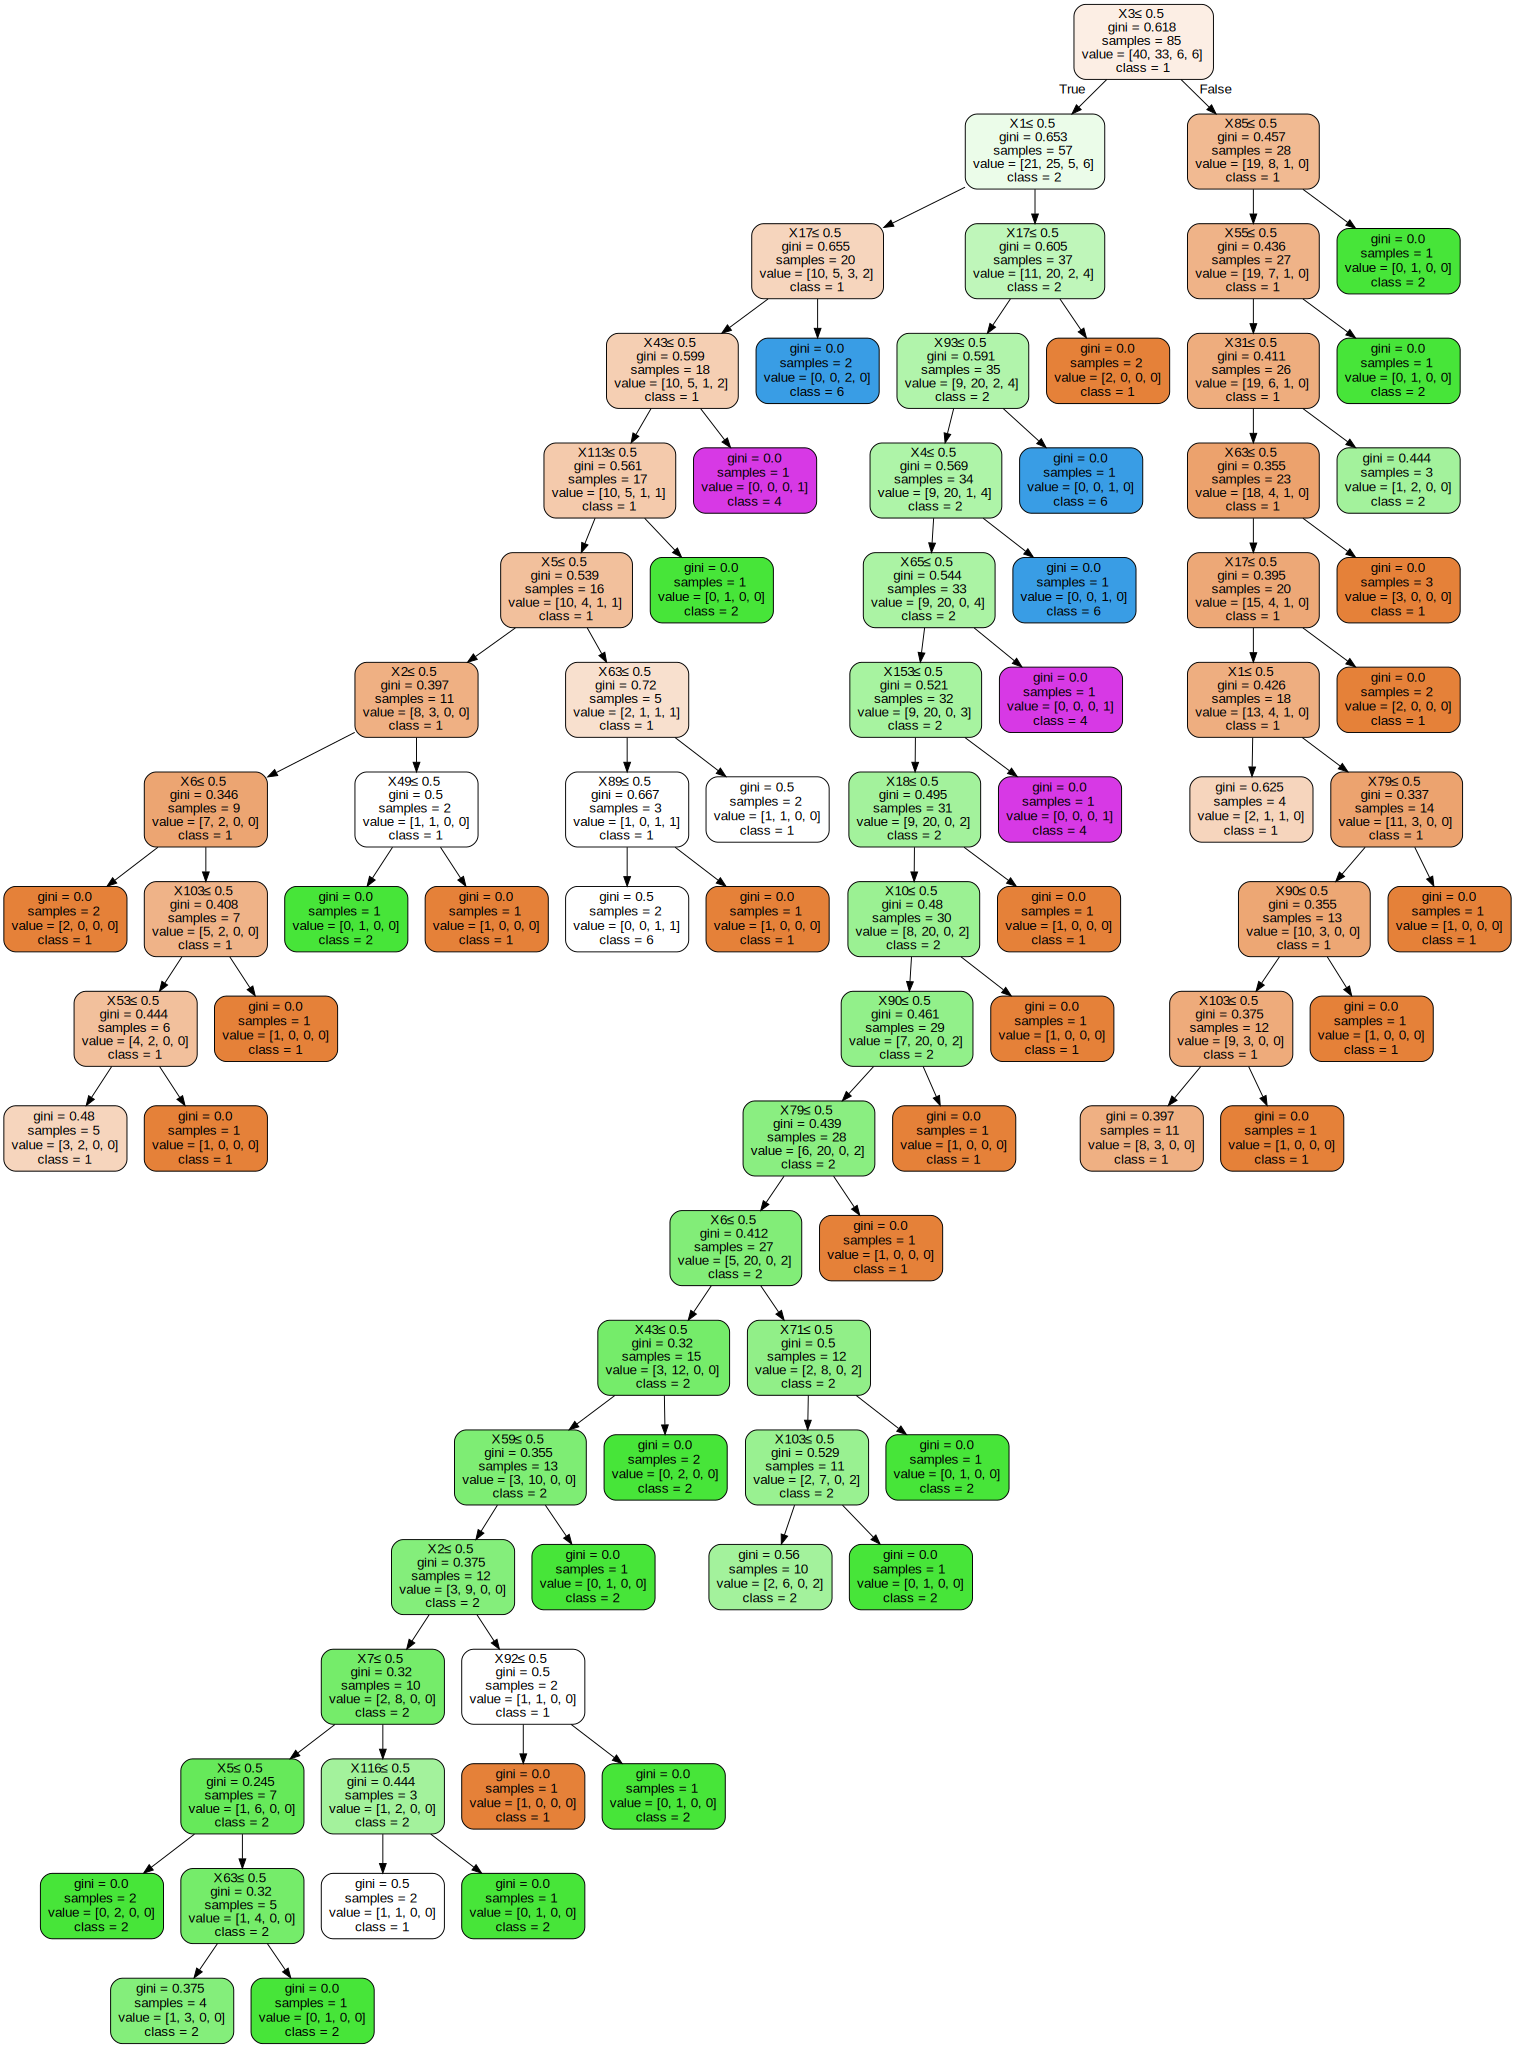

In [65]:
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = tree.export_graphviz(clf_dt, out_file=None, 
                  feature_names=None,  
                      class_names=targets,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
clf_dtr = tree.DecisionTreeRegressor(random_state=1, max_depth=None)

In [ ]:
y2 = X.pop("combat_fatalities").values